In [25]:
#import libraries to use linear regression and plotting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


In [3]:
df = pd.read_excel('Redemption-Data.xlsx')

In [4]:
df.shape

(227, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 227 non-null    datetime64[ns]
 1   Target-Group         227 non-null    object        
 2   Distance Rank        227 non-null    object        
 3   Order Amount         227 non-null    int64         
 4   Redemption Category  227 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 9.0+ KB


In [6]:
df.describe()

,Date,Order Amount,Redemption Category
count,227,227.000000,227.000000
mean,2023-12-10 22:31:11.365638656,4959.414097,2.400881
min,2023-12-04 00:00:00,1500.000000,1.000000
25%,2023-12-08 00:00:00,2154.500000,2.000000
50%,2023-12-10 00:00:00,5565.000000,3.000000
75%,2023-12-15 00:00:00,6842.000000,3.000000
max,2023-12-17 00:00:00,8984.000000,3.000000
std,NaN,2368.613482,0.699304


In [7]:
df.head()

,Date,Target-Group,Distance Rank,Order Amount,Redemption Category
0,2023-12-04,T2,D1,8621,3
1,2023-12-04,T2,D1,7528,3
2,2023-12-04,T2,D1,5707,3
3,2023-12-04,T1,D2,1759,2
4,2023-12-04,T2,D3,2006,2


In [8]:
#Replace Target-Group column to numeric values as T1 = 1, T2=2
df['Target-Group'] = df['Target-Group'].replace(['T1','T2'],[1,2])

In [9]:
#replace Distance Rank column to numeric values as D1=1, D2=2, D3=3
df['Distance Rank'] = df['Distance Rank'].replace(['D1','D2','D3'],[1,2,3])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 227 non-null    datetime64[ns]
 1   Target-Group         227 non-null    int64         
 2   Distance Rank        227 non-null    int64         
 3   Order Amount         227 non-null    int64         
 4   Redemption Category  227 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 9.0 KB


In [11]:
#rename columns
df.rename(columns={'Target-Group':'Target_Group','Distance Rank':'Distance_Rank', 'Redemption Category': 'Redemption_Category', 'Order Amount': 'Order_Amount'},inplace=True)

In [12]:
X = df[['Distance_Rank','Target_Group', 'Redemption_Category']]
y = df['Order_Amount']

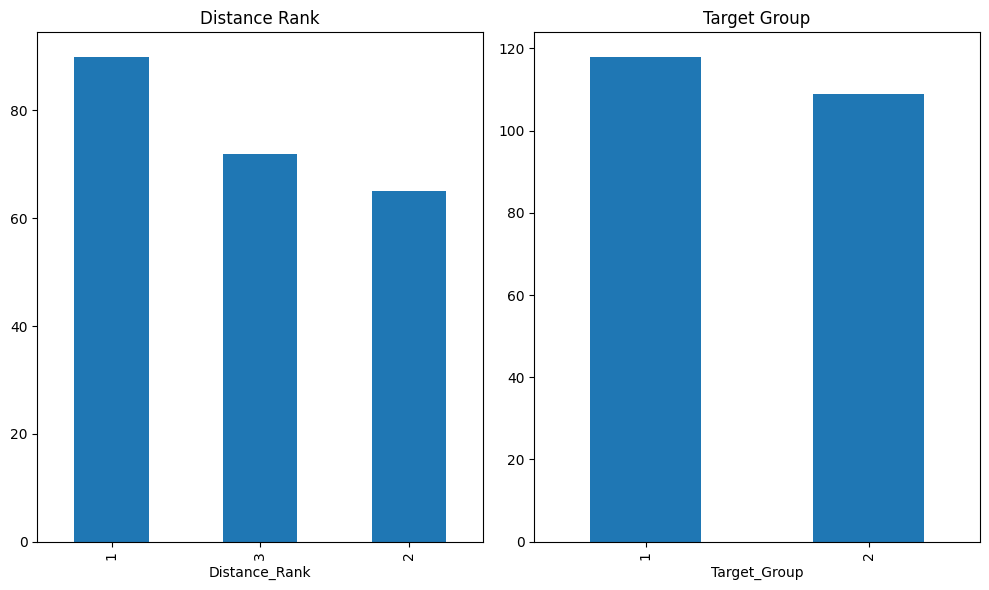

In [13]:
#plot the counts of Distance_Rank and Target_Group
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Distance Rank')
df['Distance_Rank'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
plt.title('Target Group')
df['Target_Group'].value_counts().plot(kind='bar')
plt.tight_layout()


In [14]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create a pipeline that first scales the data, then creates polynomial features, then fits a linear regression model

from sklearn.pipeline import make_pipeline
lr = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())


In [15]:
#train the model
#lr = LinearRegression()

In [28]:
#fit the model
lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [30]:
c = lr.named_steps['linearregression'].intercept_
c

-116747844386873.75

In [32]:
cf = lr.named_steps['linearregression'].coef_
cf

array([ 0.00000000e+00,  4.27193936e+01, -6.45261962e+12,  2.84509191e+03,
       -8.73238043e+01,  3.64809649e+01,  6.24873451e+01,  1.16747844e+14,
        1.10161308e+01,  1.86954824e+03])

In [35]:
#predict the test data
y_pred_test = lr.predict(X_test)
y_pred_test

array([6940.609375, 2146.234375, 4859.171875, 6834.953125, 2331.34375 ,
       6824.53125 , 7115.40625 , 1911.40625 , 4859.171875, 6940.609375,
       6834.953125, 6834.953125, 6940.609375, 6940.609375, 2146.234375,
       6834.953125, 7115.40625 , 6562.0625  , 7115.40625 , 1854.15625 ,
       6834.953125, 7038.109375, 2264.375   , 6940.609375, 2008.8125  ,
       6940.609375, 4967.25    , 6824.53125 , 1911.40625 , 6940.609375,
       1911.40625 , 1854.15625 , 2264.375   , 6940.609375, 7115.40625 ,
       2008.8125  , 4700.78125 , 5260.1875  , 1854.15625 , 6940.609375,
       7038.109375, 2264.375   , 2146.234375, 1911.40625 , 2331.34375 ,
       4700.78125 ])

In [38]:
#calculate the r2 score on test data
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred_test)   


0.9219436743809908

In [39]:
#predict the train data
y_pred_train = lr.predict(X_train)
y_pred_train

array([7038.109375, 6940.609375, 7115.40625 , 6834.953125, 6562.0625  ,
       1911.40625 , 6834.953125, 7038.109375, 7115.40625 , 2331.34375 ,
       6824.53125 , 1854.15625 , 2008.8125  , 2146.234375, 2331.34375 ,
       1854.15625 , 4906.      , 6940.609375, 2264.375   , 6824.53125 ,
       5301.03125 , 2146.234375, 6834.953125, 6824.53125 , 1911.40625 ,
       2146.234375, 6562.0625  , 2008.8125  , 6824.53125 , 4859.171875,
       6562.0625  , 1911.40625 , 2264.375   , 6940.609375, 7115.40625 ,
       7038.109375, 6940.609375, 6562.0625  , 2146.234375, 6940.609375,
       6834.953125, 7115.40625 , 6562.0625  , 4700.78125 , 7115.40625 ,
       6562.0625  , 5301.03125 , 2331.34375 , 6562.0625  , 7038.109375,
       6940.609375, 7038.109375, 6562.0625  , 6562.0625  , 2331.34375 ,
       2008.8125  , 6834.953125, 2331.34375 , 1854.15625 , 1854.15625 ,
       6940.609375, 1911.40625 , 4859.171875, 5301.03125 , 6940.609375,
       6834.953125, 7115.40625 , 6940.609375, 6562.0625  , 6824.

In [40]:
#calculate the r2 score on train data
r2_train = r2_score(y_train, y_pred_train)

0.8921739580019075

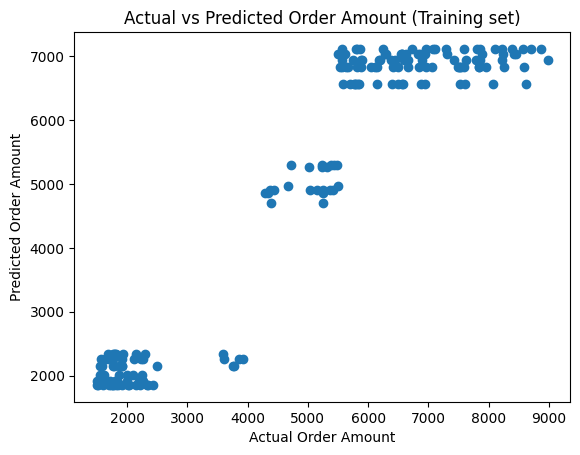

In [41]:
#check the performance of the model
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Order Amount')
plt.ylabel('Predicted Order Amount')
plt.title('Actual vs Predicted Order Amount (Training set)')
plt.show()

In [42]:
#check r2 score
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.8921739580019075

In [44]:
#lets use testing data to check the performance of the model
y_pred_test = lr.predict(X_test)
y_pred_test

array([6940.609375, 2146.234375, 4859.171875, 6834.953125, 2331.34375 ,
       6824.53125 , 7115.40625 , 1911.40625 , 4859.171875, 6940.609375,
       6834.953125, 6834.953125, 6940.609375, 6940.609375, 2146.234375,
       6834.953125, 7115.40625 , 6562.0625  , 7115.40625 , 1854.15625 ,
       6834.953125, 7038.109375, 2264.375   , 6940.609375, 2008.8125  ,
       6940.609375, 4967.25    , 6824.53125 , 1911.40625 , 6940.609375,
       1911.40625 , 1854.15625 , 2264.375   , 6940.609375, 7115.40625 ,
       2008.8125  , 4700.78125 , 5260.1875  , 1854.15625 , 6940.609375,
       7038.109375, 2264.375   , 2146.234375, 1911.40625 , 2331.34375 ,
       4700.78125 ])

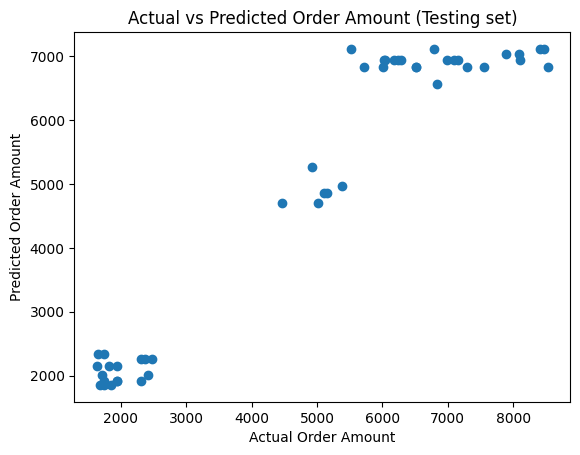

In [45]:
#plot the actual vs predicted values of testing data
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Order Amount')
plt.ylabel('Predicted Order Amount')
plt.title('Actual vs Predicted Order Amount (Testing set)') 
plt.show()

In [46]:
r2_score(y_test, y_pred_test)

0.9219436743809908